In [1]:
# standard imports
import pandas as pd
import numpy as np
# import custom netdata stuff from our package
from netdata_api_utils.utils import api, get_metrics

%matplotlib inline

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

## df_allmetrics

In [2]:
df_allmetrics = pd.DataFrame.from_dict(api(endpoint='allmetrics',options='?format=json'),orient='index')
print(df_allmetrics.shape)
df_allmetrics.sample(10)

(209, 5)


,name,context,units,last_updated,dimensions
netdata.db_points,netdata.db_points,netdata.db_points,points/s,1568752428,"{'read': {'name': 'read', 'value': 0.0}, 'gene..."
ntpd_local.sys_offset,ntpd_local.sys_offset,ntpd.sys_offset,milliseconds,1568752428,"{'offset': {'name': 'offset', 'value': -0.8294..."
netdata.statsd_useful_metrics,netdata.statsd_useful_metrics,netdata.statsd_useful_metrics,metrics,1568752428,"{'gauges': {'name': 'gauges', 'value': 0.0}, '..."
ntpd_local.sys_jitter,ntpd_local.sys_jitter,ntpd.sys_jitter,milliseconds,1568752428,"{'sys_jitter': {'name': 'system', 'value': 0.0..."
cpu.cpu1_softirqs,cpu.cpu1_softirqs,cpu.softirqs,softirqs/s,1568752428,"{'TIMER': {'name': 'TIMER', 'value': 5.7161782..."
netdata.plugin_cgroups_cpu,netdata.plugin_cgroups_cpu,netdata.plugin_cgroups_cpu,milliseconds/s,1568752428,"{'user': {'name': 'user', 'value': 0.0}, 'syst..."
disk_space._run_lock,disk_space._run_lock,disk.space,GiB,1568752428,"{'avail': {'name': 'avail', 'value': 0.0048828..."
system.intr,system.intr,system.intr,interrupts/s,1568752428,"{'interrupts': {'name': 'interrupts', 'value':..."
ip.tcpconnaborts,ip.tcpconnaborts,ip.tcpconnaborts,connections/s,1568752428,"{'TCPAbortOnData': {'name': 'baddata', 'value'..."
netdata.tcp_connects,netdata.tcp_connects,netdata.tcp_connects,events,1568752428,"{'connects': {'name': 'connects', 'value': 0.0..."


## df

In [3]:
n_metrics = 10
mins_lag = 60*4
#metrics_list = np.random.choice(df_allmetrics['name'].unique(),n_metrics,replace=False).tolist()
metrics_list = [metric for metric in df_allmetrics['name'].unique() if 'cpu' in metric]
#metrics_list ['users.cpu']
df = get_metrics(metrics_list,after=-(60*mins_lag),before=0)
print(df['timestamp'].min(),df['timestamp'].max())
print(df.shape)
df.sample(10)

2019-09-17 19:40:00 2019-09-17 20:33:20
(2007, 4)


,timestamp,key,label,value
1,2019-09-17 20:26:40,cpu.cpu1_softirqs,TIMER,11.568195
80,2019-09-17 19:40:00,cpu.cpu2,iowait,0.005000
74,2019-09-17 20:20:00,apps.cpu_system,dhcp,0.000000
24,2019-09-17 19:53:20,system.cpu,steal,0.000000
63,2019-09-17 20:33:20,cpu.cpu0_interrupts,virtio1-input.1_27,0.000000
8,2019-09-17 19:40:00,cpu.cpu0_cpuidle,C0 (active),100.000000
62,2019-09-17 19:40:00,cpu.cpu0_interrupts,virtio1-output.0_26,0.963309
17,2019-09-17 19:40:00,cpu.cpu2_softnet_stat,dropped,0.000000
22,2019-09-17 20:06:40,groups.cpu_user,netdata,0.212806
109,2019-09-17 20:26:40,apps.cpu_user,kernel,0.017499


## Save Data

In [4]:
# save sample of data
df.to_csv('../data/netdata_sample.csv',index=False)

## Plots

/home/andrewm4894/anaconda3/envs/netdata-learn/lib/python3.6/site-packages/pandas/plotting/_matplotlib/core.py:338: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


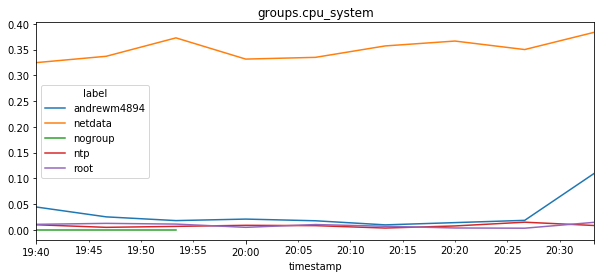

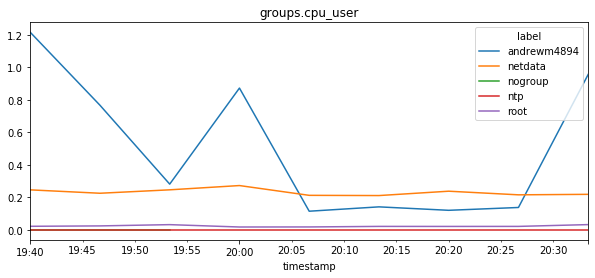

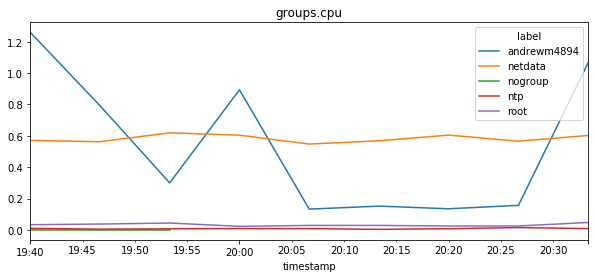

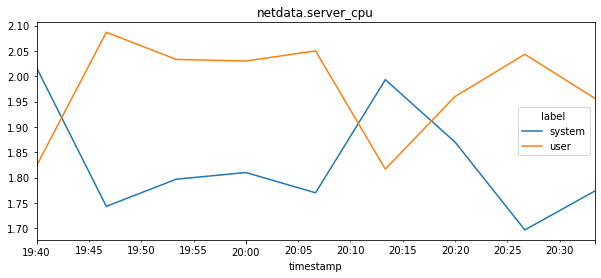

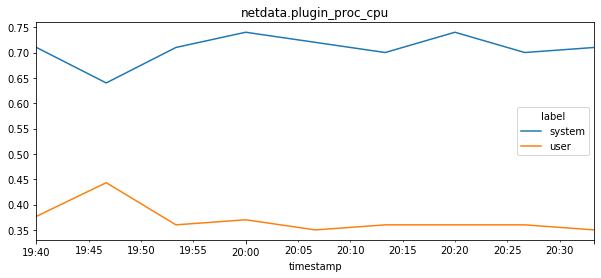

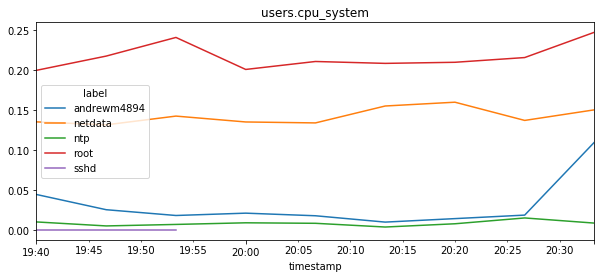

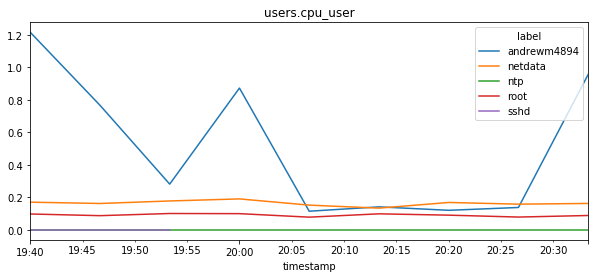

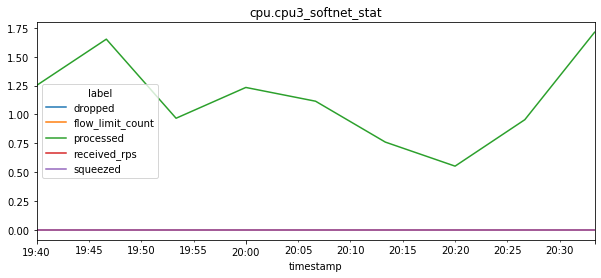

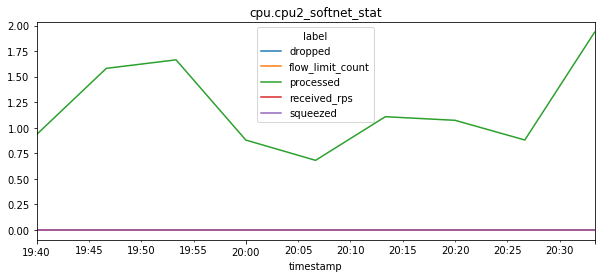

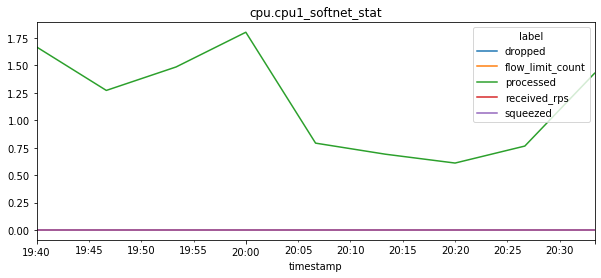

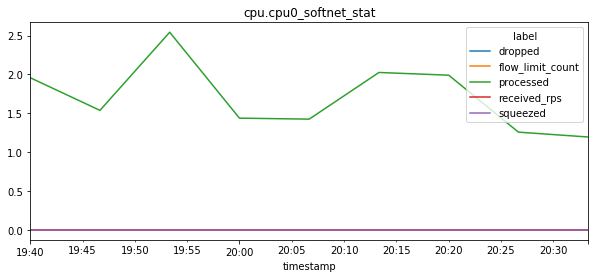

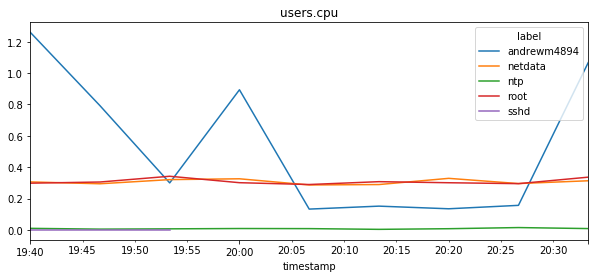

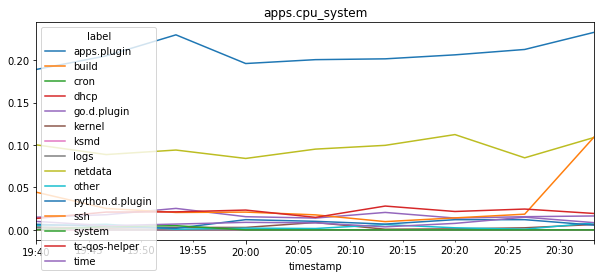

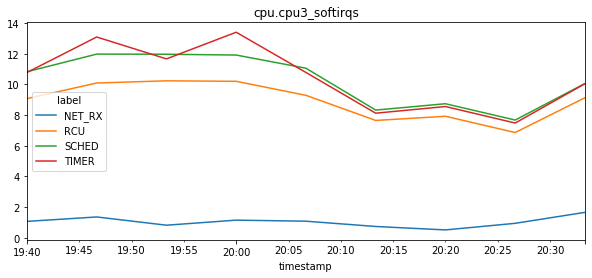

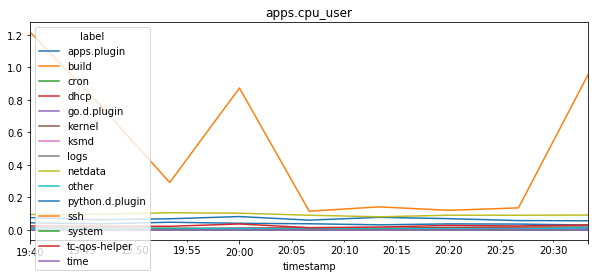

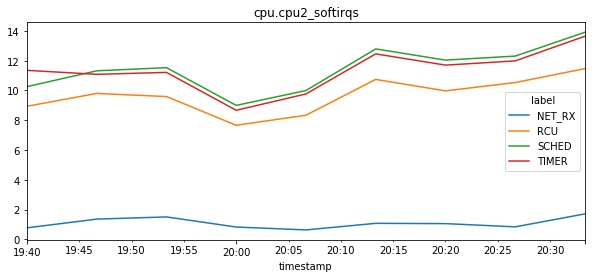

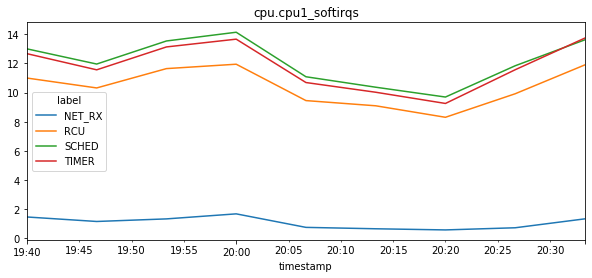

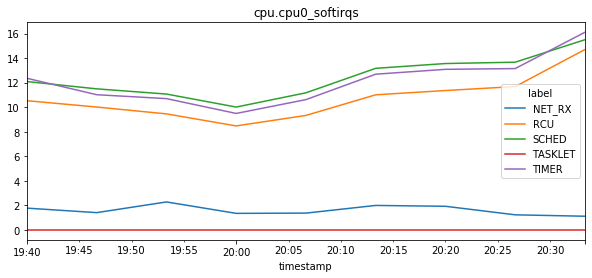

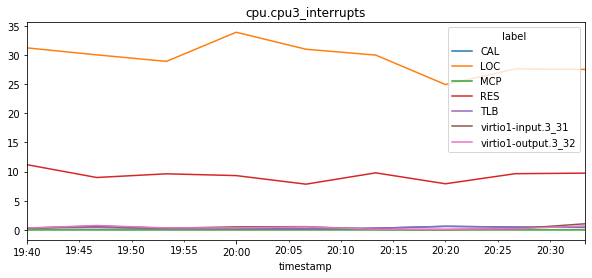

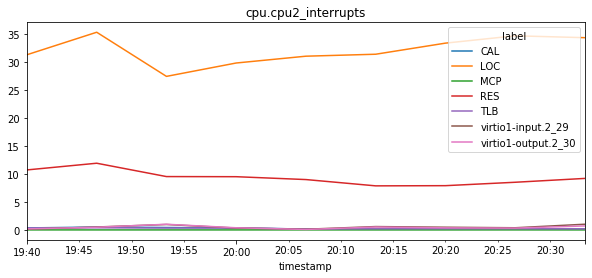

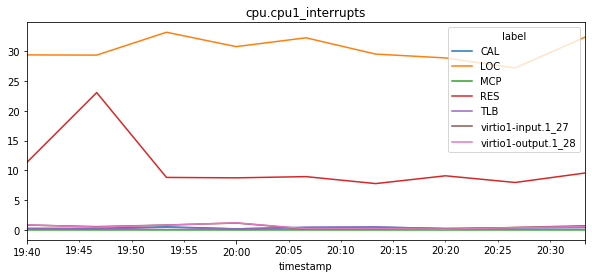

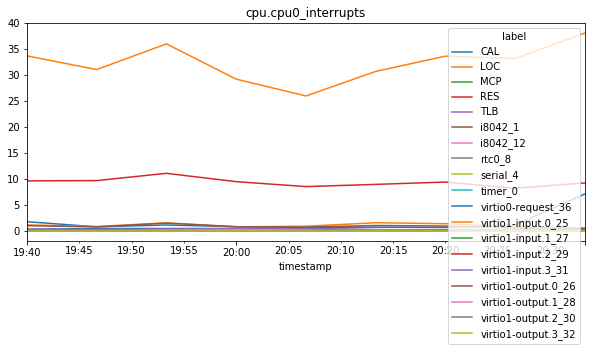

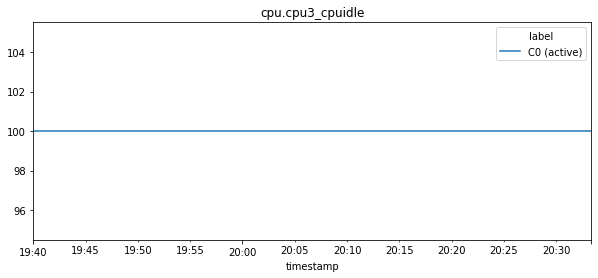

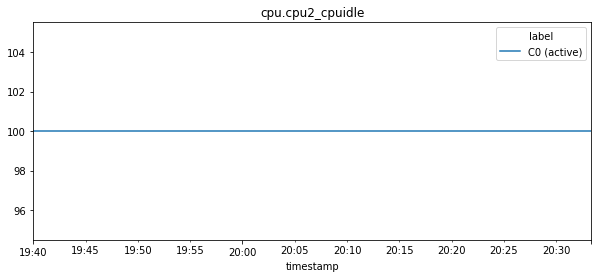

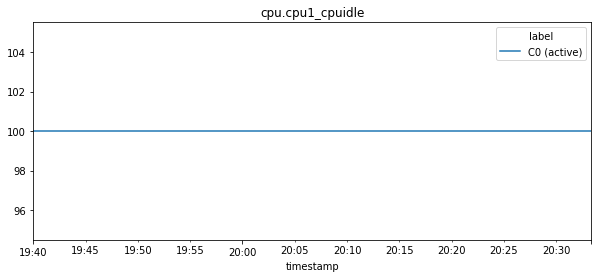

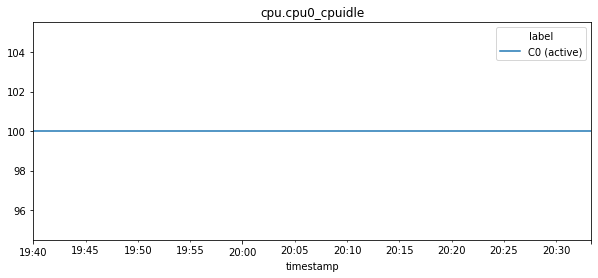

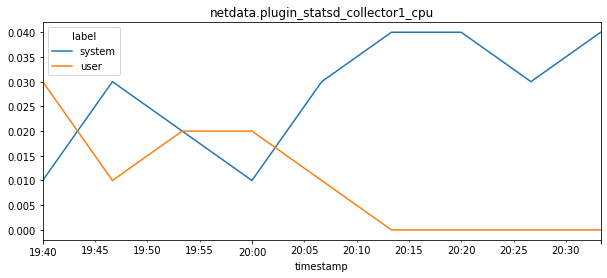

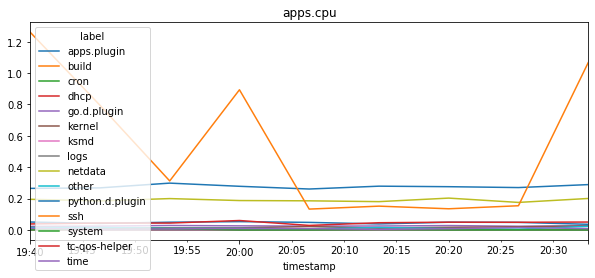

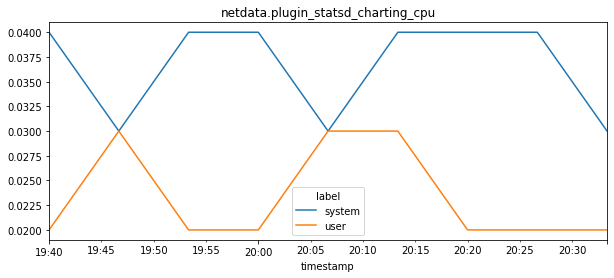

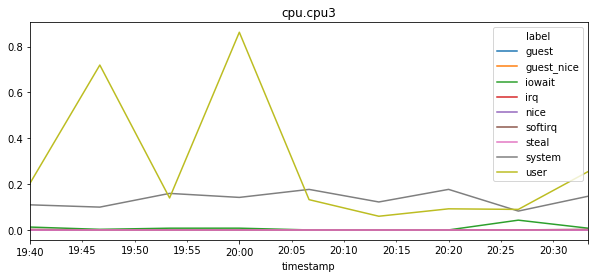

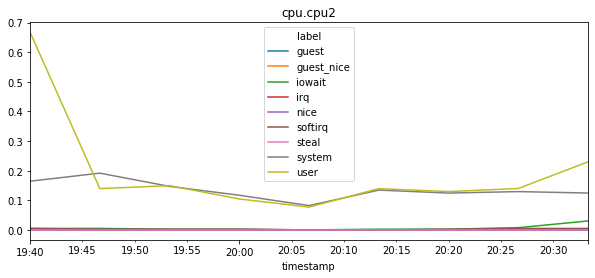

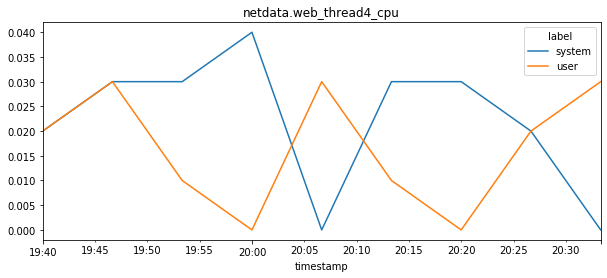

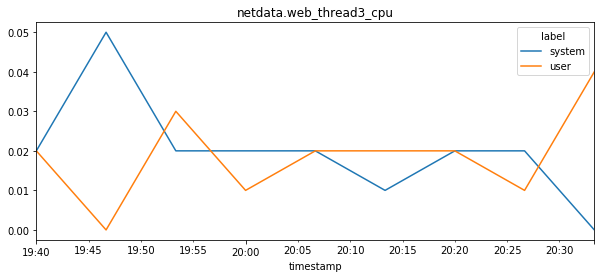

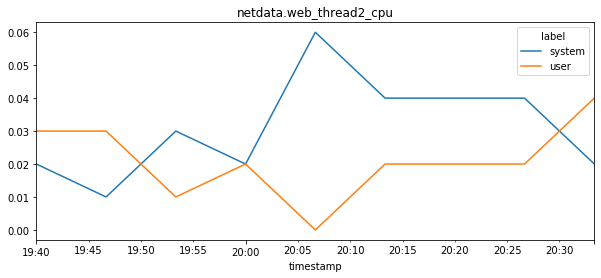

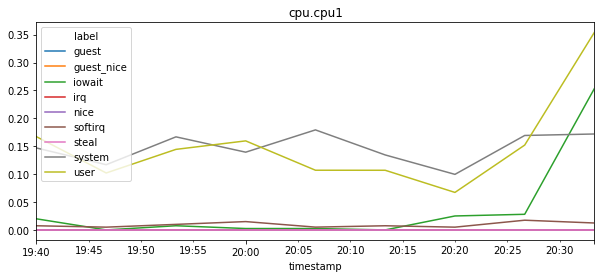

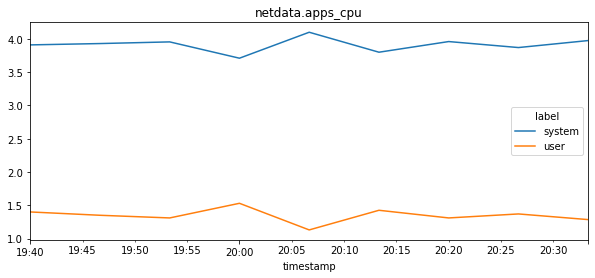

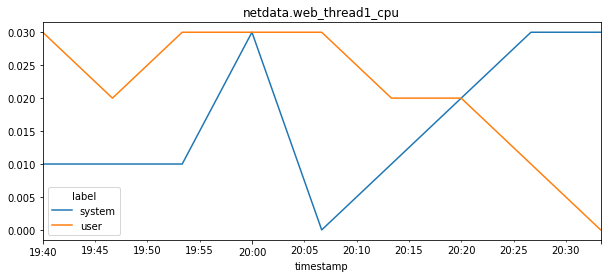

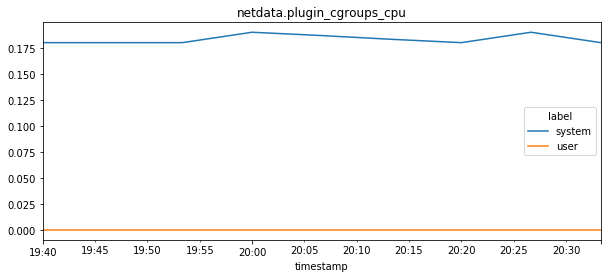

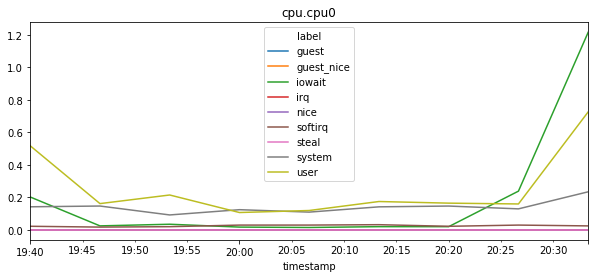

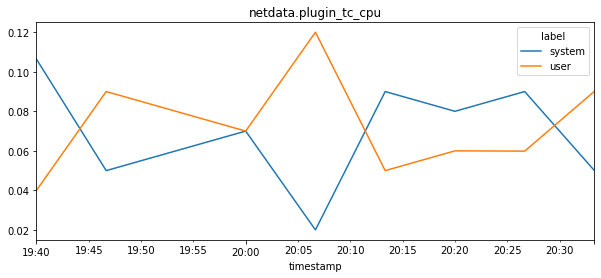

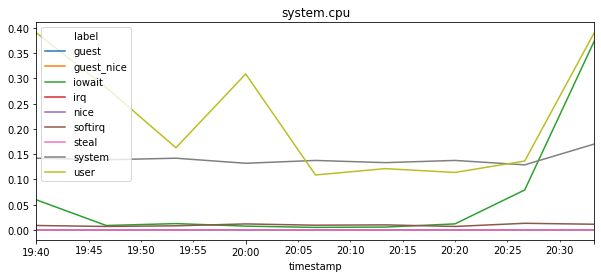

In [5]:
# plots
for metric in metrics_list:
    df[df['key']==metric].pivot(index='timestamp',columns='label',values='value').plot(title=metric, figsize=(10,4))